In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# imports for plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
#plt.rcParams['figure.figsize'] = (8, 6)
#plt.rcParams['font.size'] = 14

### Look at the example below. What does this tell you about why we should bother with data visualization?

![anscomb's quartet](./assets/images/anscombs%20quartert%20visualization.png)

In [4]:
# Read in the ufo data.
ufo = pd.read_csv('./datasets/ufo.csv',parse_dates=['Time'])
ufo['Year'] = ufo.Time.dt.year

In [5]:
# Read in the Boston housing data.
housing_csv = './datasets/boston_housing_data.csv'
housing = pd.read_csv(housing_csv)
# remove space from column names
housing.columns = [x.strip() for x in housing.columns]
housing.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,4.98,24.0


## Univariate Analysis
### Histograms

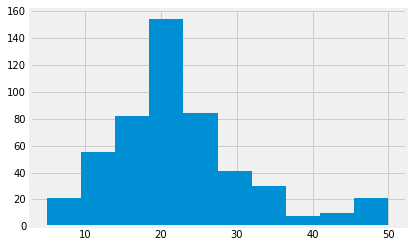

In [4]:
# basic histogram using pandas 
housing.MEDV.hist();

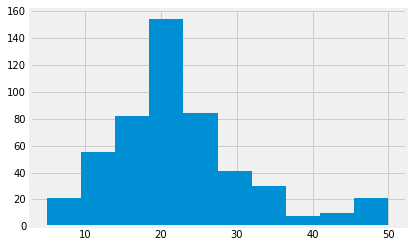

In [5]:
# passing series into plt.hist()-same output
plt.hist(housing.MEDV);

### Boxplots - (if single variable is continuous)

In [6]:
housing[['MEDV']].describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


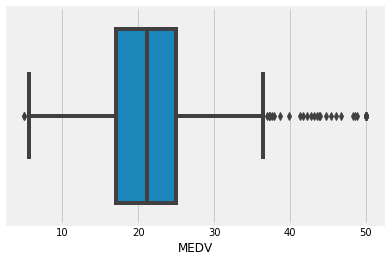

In [7]:
# sns denotes a seaborn plot function that takes one or more pandas series

# referencing the descriptive statistics above, interpret what the boxplot is showing us

sns.boxplot(housing.MEDV);

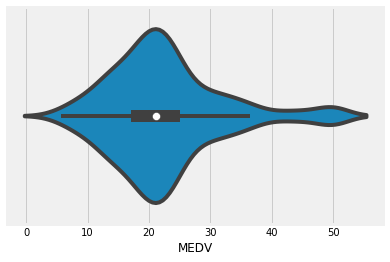

In [8]:
# what are we seeing with this boxplot variation here? - 
sns.violinplot(housing.MEDV);

### Line Plots

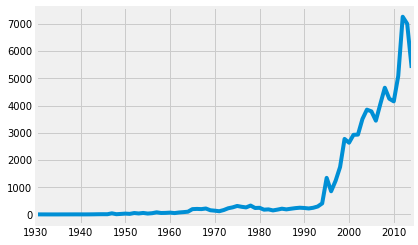

In [22]:
#line plot only makes sense when the x-axis can be ordered - as here, by year
ufo.Year.value_counts().sort_index().plot();

## Bivariate Analysis

### Data Dictionary for housing dataset

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [9]:
subset = housing[['LSTAT','CHAS','MEDV']]
subset.head(2)

,LSTAT,CHAS,MEDV
0,4.98,0,24.0
1,9.14,0,21.6


### Scatter plots work great when the two variables we're plotting are continuous

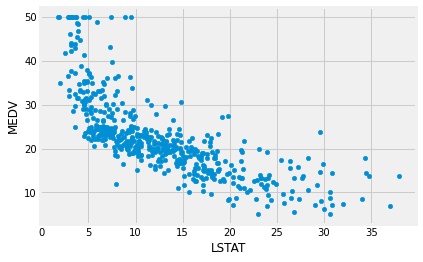

In [10]:
subset.plot(y='MEDV',x='LSTAT',kind='scatter');

**and less great when one variable is continuous and another is categorical**

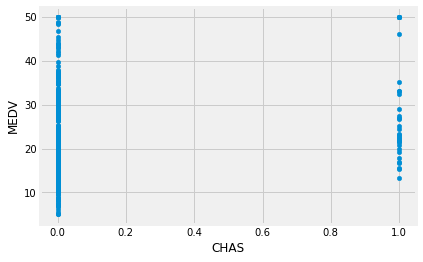

In [11]:
subset.plot(x='CHAS',y='MEDV',kind='scatter');

**but boxplots are great when one variable is continuous and another is categorical**

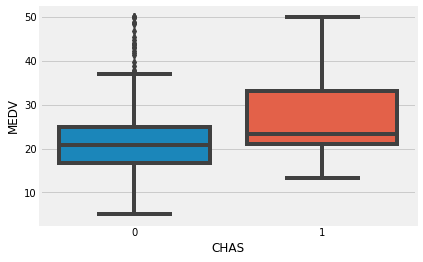

In [12]:
sns.boxplot(y=subset.MEDV,x=subset.CHAS);

**we can also plot an aggregate value like a mean to represent the same variables**

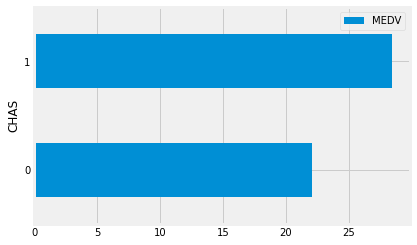

In [13]:
grouped_chas = subset.groupby('CHAS')['MEDV'].mean().reset_index()
grouped_chas.plot(x='CHAS',y='MEDV',kind='barh');

**plotting an aggregate value like a mean is our only option with two categorical variables**

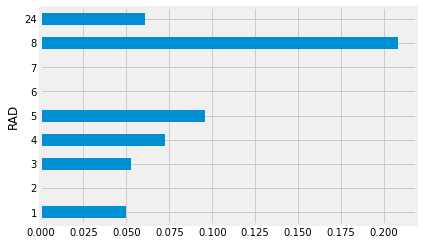

In [10]:
# a certain type of accessibility to radial highways is much more likely to yield access to the charles
housing[['CHAS','RAD']].groupby(['RAD'])['CHAS'].mean().plot(x='CHAS',y='MEDV',kind='barh');

**class exercise, look at the seaborn gallery (http://seaborn.pydata.org/examples/index.html) and create new plot variations that show the relationship between a categorical feature and MEDV as well as a continuous feature and MEDV**

In [23]:
housing.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,4.98,24.0


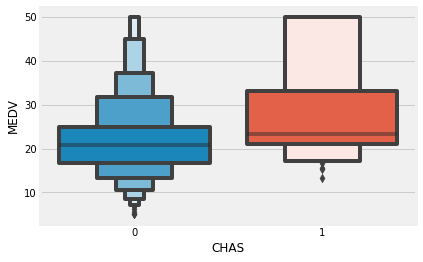

In [19]:
# your seaborn plot of some categorical feature and MEDV
sns.boxenplot(x=subset.CHAS,y=subset.MEDV);

In [ ]:
# your seaborn plot of some continuous feature and MEDV
sns.boxenplot(x=subset.CHAS,y=subset.MEDV);

## syntax

### adding parameters - specific to the plot function

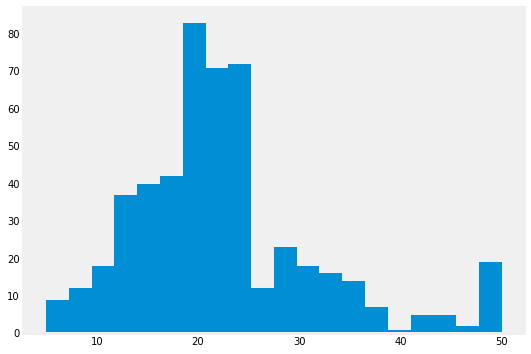

In [43]:
# adding parameters - see documentation
housing.MEDV.hist(figsize=(8,6),grid=False,bins=20);

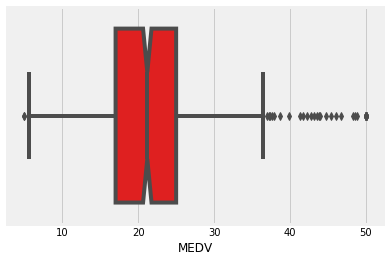

In [44]:
sns.boxplot(housing.MEDV,color='red',notch=True);

### matplotlib

Using matplotlib, there two big components that we need to consider:

* The Figure is the overall window or page that everything is drawn on.
* To the figure you add Axes. The Axes is the area on which the data is plotted and can have ticks, labels, etc. associated with it. Figures can contain multiple Axes.
    * Each Axes has an x-axis and a y-axis, which contain ticks, which have major and minor ticklines and ticklabels. There’s also the axis labels, title, and legend to consider when you want to customize your axes, but also taking into account the axis scales and gridlines might come in handy.

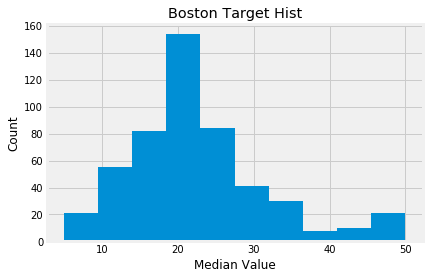

In [45]:
# we can modify the axes - https://matplotlib.org/api/axes_api.html
ax = housing.MEDV.hist() #this histogram is a matplotlib axes object
ax.set_xlabel('Median Value') #as with dataframes, we can modify it with other methods
ax.set_ylabel('Count')
ax.set_title('Boston Target Hist')
plt.show()

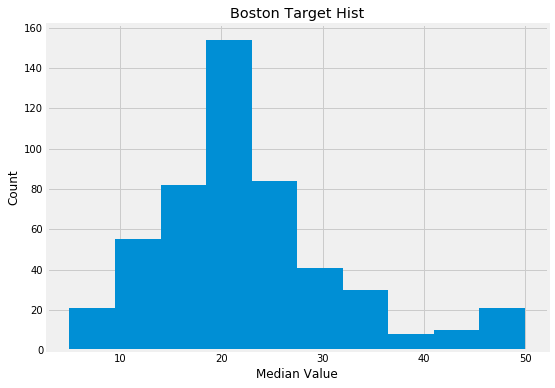

In [46]:
# we can also modify the figure - 
# https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure
plt.figure(figsize=(8,6))
ax = housing.MEDV.hist()
ax.set_xlabel('Median Value')
ax.set_ylabel('Count')
ax.set_title('Boston Target Hist')
plt.show()

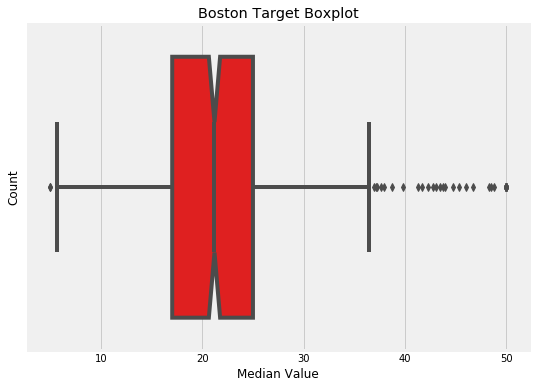

In [47]:
# seaborn plots are also matplotlib axes objects, so we can modify them the same way as well as by specifying 
# parameters for the plot function
plt.figure(figsize=(8,6))
ax = sns.boxplot(housing.MEDV,color='red',notch=True)
ax.set_xlabel('Median Value')
ax.set_ylabel('Count')
ax.set_title('Boston Target Boxplot')
plt.show()